<a href="https://colab.research.google.com/github/altamashsameer/ThirdSemFilter/blob/master/Set_Exercise_Fundamentals_of_data_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df = pd.DataFrame(pd.read_csv("/content/Live.csv"))

In [11]:
df.shape

(7050, 13)

In [12]:
df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_reactions       7050 non-null   float64
 1   num_comments        7050 non-null   float64
 2   num_shares          7050 non-null   float64
 3   num_likes           7050 non-null   float64
 4   num_loves           7050 non-null   float64
 5   num_wows            7050 non-null   float64
 6   num_hahas           7050 non-null   float64
 7   num_sads            7050 non-null   float64
 8   num_angrys          7050 non-null   float64
 9   status_type_link    7050 non-null   float64
 10  status_type_photo   7050 non-null   float64
 11  status_type_status  7050 non-null   float64
 12  status_type_video   7050 non-null   float64
dtypes: float64(13)
memory usage: 716.1 KB


In [14]:
df.isnull().sum()*100/df.shape[0]

,0
num_reactions,0.0
num_comments,0.0
num_shares,0.0
num_likes,0.0
num_loves,0.0
num_wows,0.0
num_hahas,0.0
num_sads,0.0
num_angrys,0.0
status_type_link,0.0


In [15]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,0.048857,0.010689,0.011689,0.045657,0.019374,0.004638,0.004436,0.004778,0.003651,0.008936,0.608227,0.051773,0.331064
std,0.098222,0.042384,0.038435,0.095429,0.060842,0.031366,0.025205,0.031317,0.023446,0.094115,0.488181,0.221584,0.470629
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003609,0.000000,0.000000,0.003609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.012633,0.000191,0.000000,0.012314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.046497,0.001096,0.001168,0.039225,0.004566,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


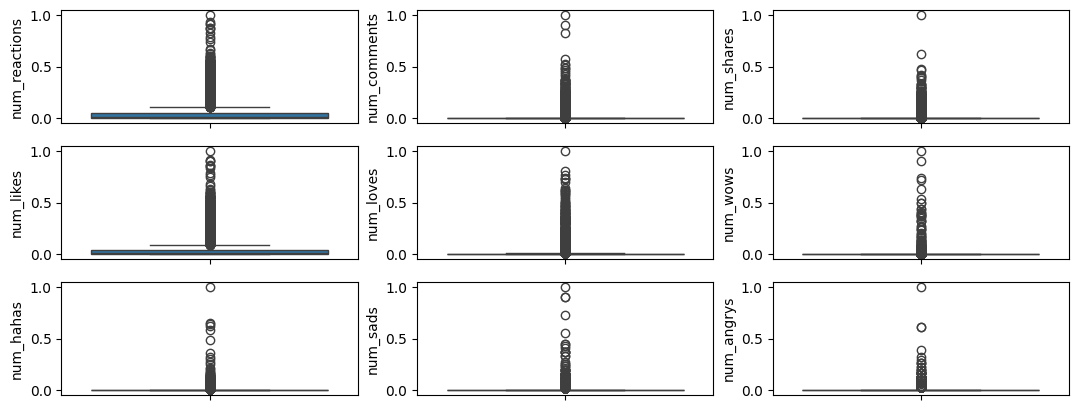

In [45]:
# Outlier Analysis
fig, axs = plt.subplots(3,3, figsize = (13,5))
plt1 = sns.boxplot(df['num_reactions'], ax = axs[0,0])
plt2 = sns.boxplot(df['num_comments'], ax = axs[0,1])
plt3 = sns.boxplot(df['num_shares'], ax = axs[0,2])
plt1 = sns.boxplot(df['num_likes'], ax = axs[1,0])
plt2 = sns.boxplot(df['num_loves'], ax = axs[1,1])
plt3 = sns.boxplot(df['num_wows'], ax = axs[1,2])
plt1 = sns.boxplot(df['num_hahas'], ax = axs[2,0])
plt2 = sns.boxplot(df['num_sads'], ax = axs[2,1])
plt3 = sns.boxplot(df['num_angrys'], ax = axs[2,2])

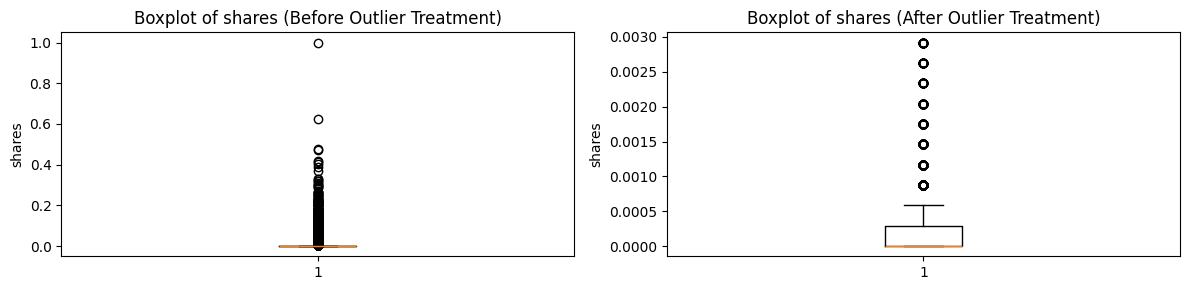

In [54]:
plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.boxplot(df.num_shares)
plt.title("Boxplot of shares (Before Outlier Treatment)")
plt.ylabel("shares")


Q1 = df.num_shares.quantile(0.25)
Q3 = df.num_shares.quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[(df.num_shares >= Q1 - 1.5*IQR) & (df.num_shares <= Q3 + 1.5*IQR)]


plt.subplot(1, 2, 2)
plt.boxplot(df_filtered.num_shares)
plt.title("Boxplot of shares (After Outlier Treatment)")
plt.ylabel("shares")

# Adjust layout and display
plt.tight_layout()
plt.show()

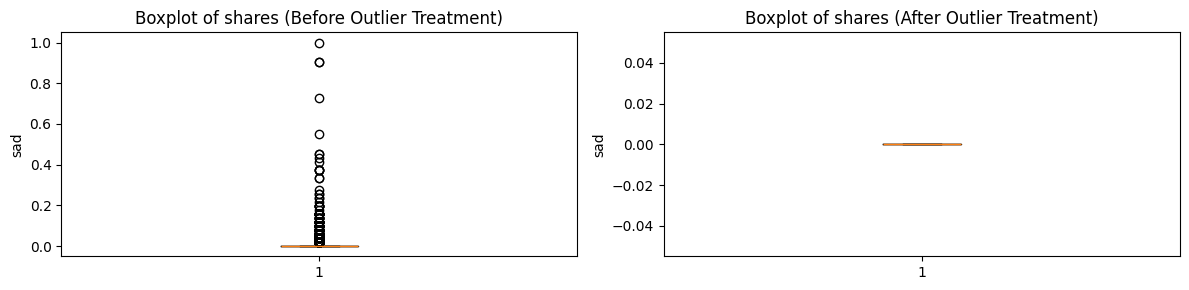

In [52]:
plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.boxplot(df.num_sads)
plt.title("Boxplot of shares (Before Outlier Treatment)")
plt.ylabel("sad")


Q1 = df.num_sads.quantile(0.25)
Q3 = df.num_sads.quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[(df.num_sads >= Q1 - 1.5*IQR) & (df.num_sads <= Q3 + 1.5*IQR)]


plt.subplot(1, 2, 2)
plt.boxplot(df_filtered.num_sads)
plt.title("Boxplot of shares (After Outlier Treatment)")
plt.ylabel("sad")

# Adjust layout and display
plt.tight_layout()
plt.show()

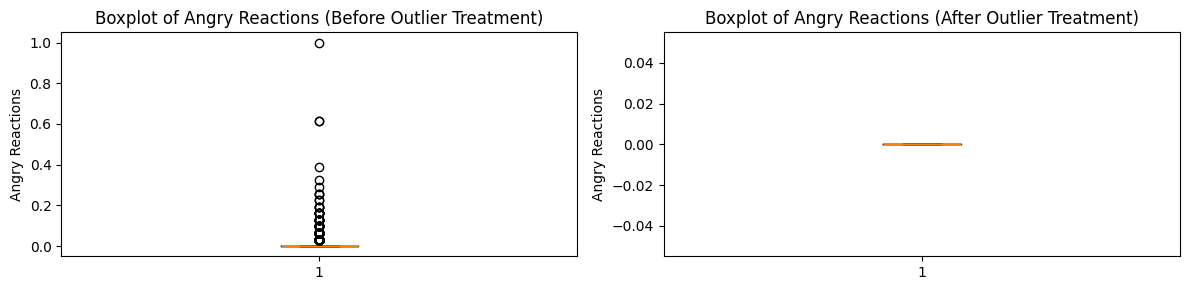

In [53]:
plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.boxplot(df.num_angrys)
plt.title("Boxplot of Angry Reactions (Before Outlier Treatment)")  # Changed title
plt.ylabel("Angry Reactions")  # Changed y-label


Q1 = df.num_angrys.quantile(0.25)
Q3 = df.num_angrys.quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[(df.num_angrys >= Q1 - 1.5*IQR) & (df.num_angrys <= Q3 + 1.5*IQR)]


plt.subplot(1, 2, 2)
plt.boxplot(df_filtered.num_angrys)
plt.title("Boxplot of Angry Reactions (After Outlier Treatment)")  # Changed title
plt.ylabel("Angry Reactions")  # Changed y-label

# Adjust layout and display
plt.tight_layout()
plt.show()

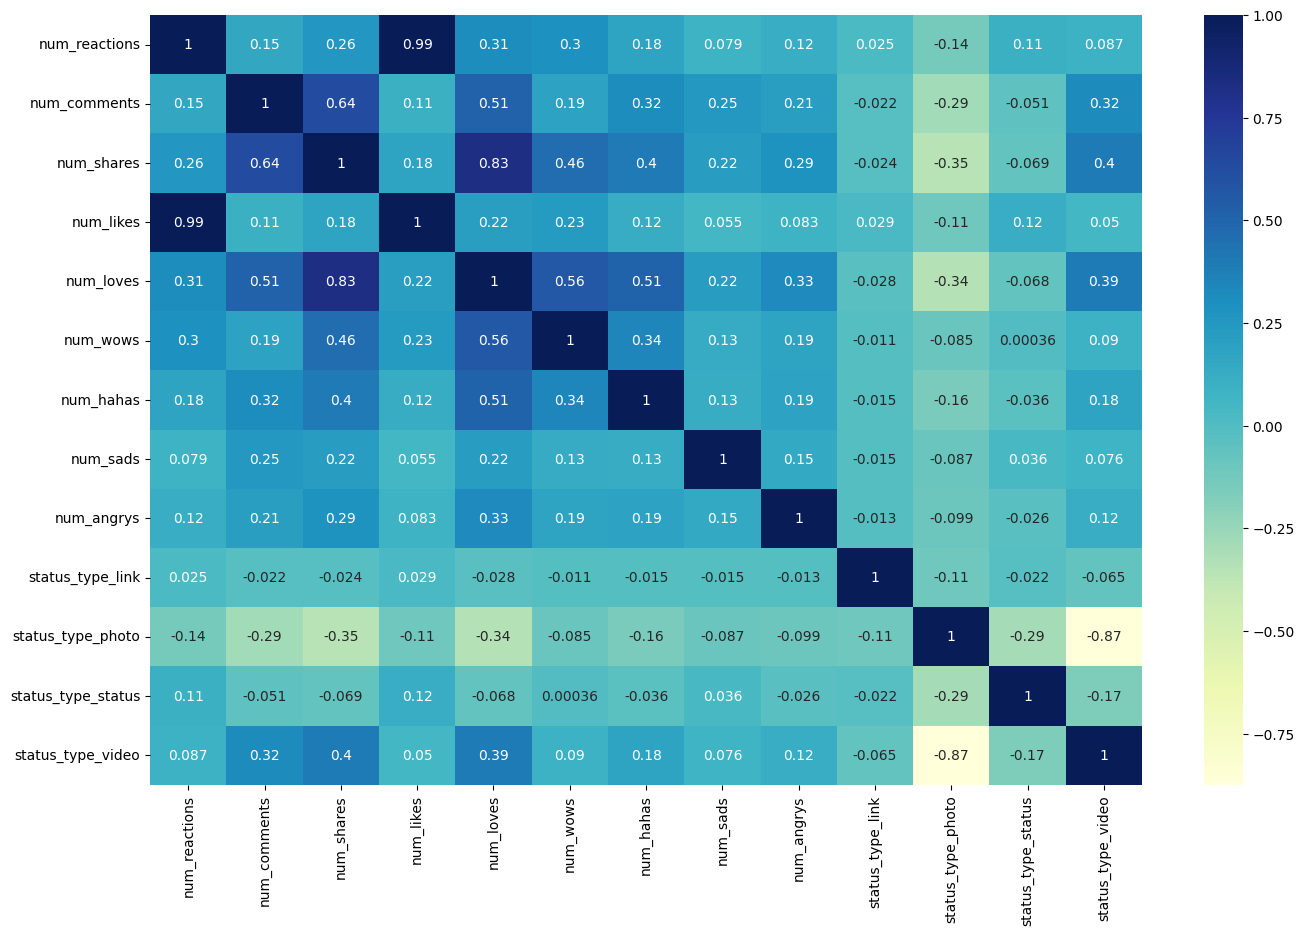

In [15]:
# Now you can create the heatmap
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

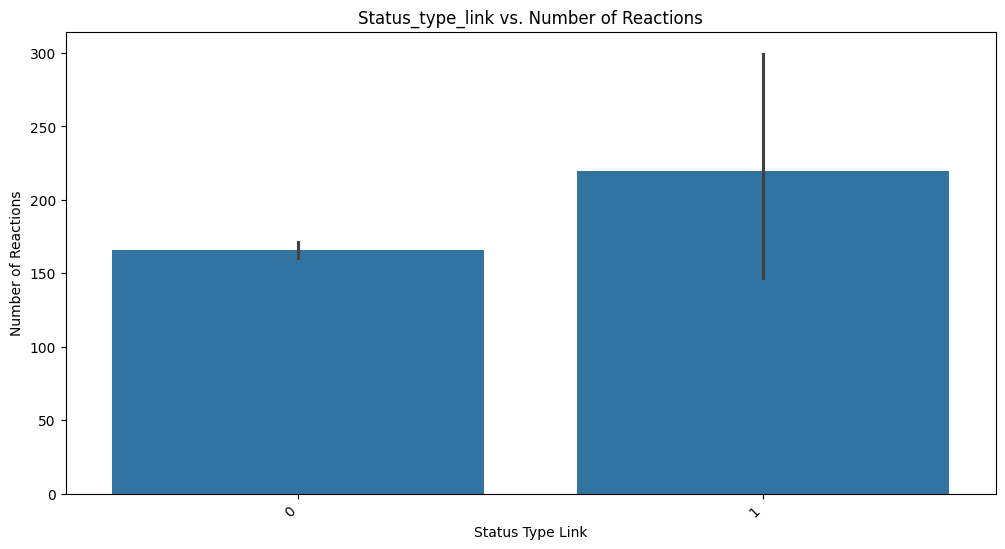

In [40]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='status_type_link', y='num_reactions', data=df) # Example with 'num_reactions'
plt.title('Status_type_link vs. Number of Reactions')
plt.xlabel('Status Type Link')
plt.ylabel('Number of Reactions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

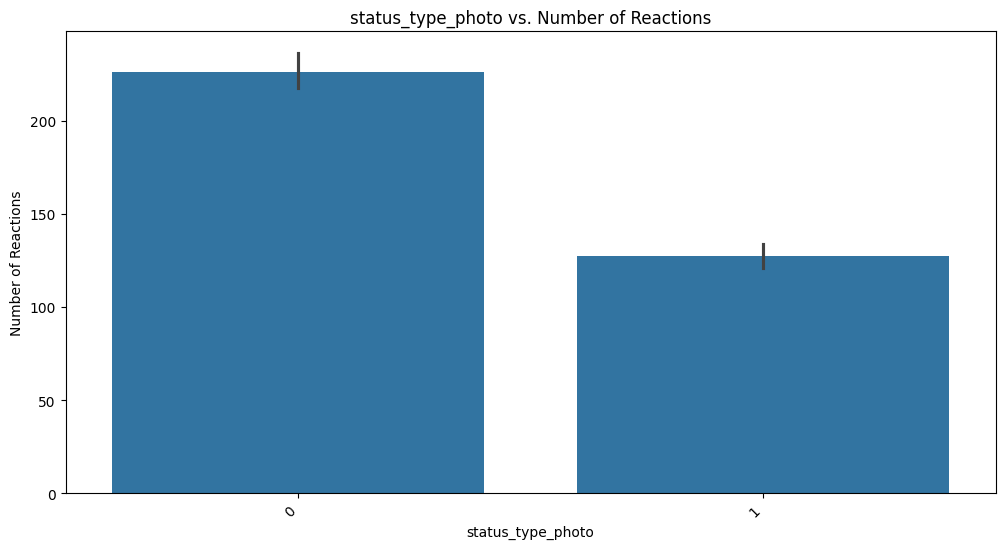

In [37]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='status_type_photo', y='num_reactions', data=df) # Example with 'num_reactions'
plt.title('status_type_photo vs. Number of Reactions')
plt.xlabel('status_type_photo')
plt.ylabel('Number of Reactions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

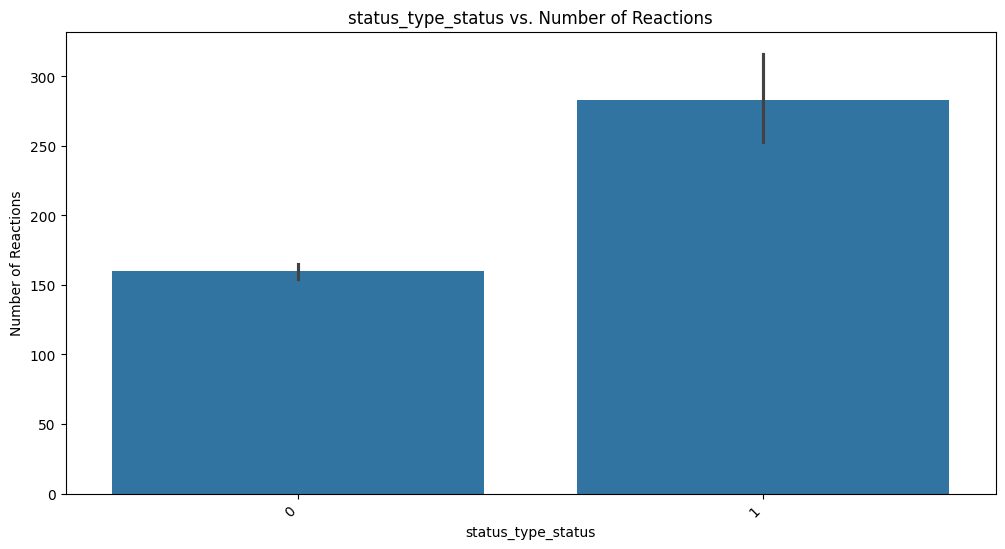

In [36]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='status_type_status', y='num_reactions', data=df) # Example with 'num_reactions'
plt.title('status_type_status vs. Number of Reactions')
plt.xlabel('status_type_status')
plt.ylabel('Number of Reactions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

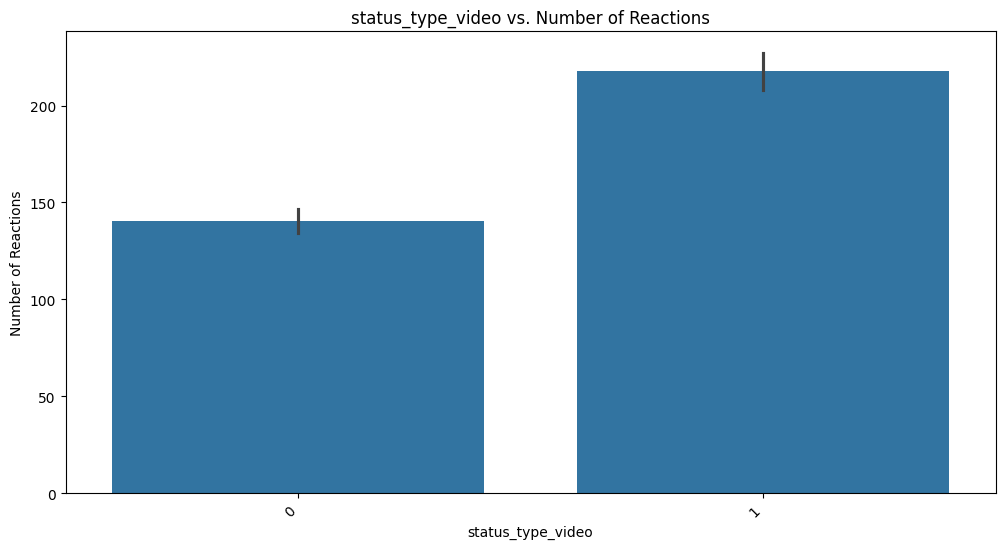

In [35]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='status_type_video', y='num_reactions', data=df) # Example with 'num_reactions'
plt.title('status_type_video vs. Number of Reactions')
plt.xlabel('status_type_video')
plt.ylabel('Number of Reactions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.75, test_size = 0.25, random_state = 100)

**Decision Tree**

In [55]:
from sklearn.tree import DecisionTreeClassifier

#X= df.drop('class', axis=1)

X = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows','num_hahas','num_sads','num_angrys']]
y = df['status_type_video']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print(f'Decision Tree - Accuracy: {accuracy * 100:.2f}%')
print("\nClassification Report:\n\n", report)

Decision Tree - Accuracy: 83.61%

Classification Report:

               precision    recall  f1-score   support

         0.0       0.88      0.87      0.88      1189
         1.0       0.74      0.76      0.75       574

    accuracy                           0.84      1763
   macro avg       0.81      0.82      0.81      1763
weighted avg       0.84      0.84      0.84      1763



In [56]:
from sklearn.tree import DecisionTreeClassifier

#X= df.drop('class', axis=1)

X = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows','num_hahas','num_sads','num_angrys']]
y = df['status_type_photo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print(f'Decision Tree model - Accuracy: {accuracy * 100:.2f}%')
print("\nClassification Report:\n\n", report)

Decision Tree model - Accuracy: 77.65%

Classification Report:

               precision    recall  f1-score   support

         0.0       0.69      0.74      0.72       672
         1.0       0.83      0.80      0.82      1091

    accuracy                           0.78      1763
   macro avg       0.76      0.77      0.77      1763
weighted avg       0.78      0.78      0.78      1763



In [57]:
from sklearn.tree import DecisionTreeClassifier


X = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows','num_hahas','num_sads','num_angrys']]
y = df['status_type_link']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print(f'Decision Tree model - Accuracy: {accuracy * 100:.2f}%')
print("\nClassification Report:\n\n", report)

Decision Tree model - Accuracy: 98.53%

Classification Report:

               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1745
         1.0       0.00      0.00      0.00        18

    accuracy                           0.99      1763
   macro avg       0.49      0.50      0.50      1763
weighted avg       0.98      0.99      0.98      1763



In [58]:
from sklearn.tree import DecisionTreeClassifier

#X= df.drop('class', axis=1)

X = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows','num_hahas','num_sads','num_angrys']]
y = df['status_type_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred,zero_division=0)

print(f'Decision Tree model - Accuracy: {accuracy * 100:.2f}%')
print("\nClassification Report:\n\n", report)

Decision Tree model - Accuracy: 91.32%

Classification Report:

               precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      1683
         1.0       0.15      0.20      0.17        80

    accuracy                           0.91      1763
   macro avg       0.56      0.57      0.56      1763
weighted avg       0.92      0.91      0.92      1763



In [35]:
def compute_mean(numbers):
  return np.mean(numbers)

# Example usage:
numbers = [83.61,77.88, 98.53, 91.32]
mean = compute_mean(numbers)
print(f"The mean accuracy of Decision Tree is: {mean}")

The mean accuracy of Decision Tree is: 87.835


**Random** **Forest**

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

X = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows','num_hahas','num_sads','num_angrys']]
y = df['status_type_video']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print(f'Accuracy of Random Forest model: {accuracy * 100:.2f}%')
print("\nClassification Report:\n", report)

Accuracy of Random Forest model: 86.73%

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90      1189
           1       0.82      0.76      0.79       574

    accuracy                           0.87      1763
   macro avg       0.85      0.84      0.85      1763
weighted avg       0.87      0.87      0.87      1763



In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

X = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows','num_hahas','num_sads','num_angrys']]
y = df['status_type_photo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print(f'Accuracy of Random Forest model: {accuracy * 100:.2f}%')
print("\nClassification Report:\n", report)

Accuracy of Random Forest model: 81.17%

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.75       672
           1       0.83      0.87      0.85      1091

    accuracy                           0.81      1763
   macro avg       0.80      0.79      0.80      1763
weighted avg       0.81      0.81      0.81      1763



In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

X = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows','num_hahas','num_sads','num_angrys']]
y = df['status_type_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print(f'Accuracy of Random Forest model: {accuracy * 100:.2f}%')
print("\nClassification Report:\n", report)

Accuracy of Random Forest model: 94.44%

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1683
           1       0.18      0.06      0.09        80

    accuracy                           0.94      1763
   macro avg       0.57      0.52      0.53      1763
weighted avg       0.92      0.94      0.93      1763



In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

X = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows','num_hahas','num_sads','num_angrys']]
y = df['status_type_link']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred,zero_division=0)

print(f'Accuracy of Random Forest model: {accuracy * 100:.2f}%')
print("\nClassification Report:\n", report)

Accuracy of Random Forest model: 98.98%

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1745
           1       0.00      0.00      0.00        18

    accuracy                           0.99      1763
   macro avg       0.49      0.50      0.50      1763
weighted avg       0.98      0.99      0.98      1763



In [33]:
def compute_mean(numbers):
  return np.mean(numbers)

# Example usage:
numbers = [86.73,81.17, 94.44, 98.98]
mean = compute_mean(numbers)
print(f"The mean accuracy of Random Forest is: {mean}")

The mean accuracy of Random Forest is: 90.33000000000001


**KNN**

In [67]:
from sklearn.neighbors import KNeighborsClassifier

X = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows','num_hahas','num_sads','num_angrys']]
y = df['status_type_video']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print(f'Accuracy of KNN model: {accuracy * 100:.2f}%')
print("\nClassification Report:\n", report)

Accuracy of Random Forest model: 84.17%

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      1189
           1       0.83      0.64      0.73       574

    accuracy                           0.84      1763
   macro avg       0.84      0.79      0.81      1763
weighted avg       0.84      0.84      0.84      1763



In [68]:
from sklearn.neighbors import KNeighborsClassifier

X = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows','num_hahas','num_sads','num_angrys']]
y = df['status_type_photo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print(f'Accuracy of KNN model: {accuracy * 100:.2f}%')
print("\nClassification Report:\n", report)

Accuracy of Random Forest model: 77.99%

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.64      0.69       672
           1       0.80      0.87      0.83      1091

    accuracy                           0.78      1763
   macro avg       0.77      0.75      0.76      1763
weighted avg       0.78      0.78      0.78      1763



In [63]:
from sklearn.neighbors import KNeighborsClassifier

X = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows','num_hahas','num_sads','num_angrys']]
y = df['status_type_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print(f'Accuracy of KNN model: {accuracy * 100:.2f}%')
print("\nClassification Report:\n", report)

Accuracy of KNN model: 95.24%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1683
         1.0       0.40      0.10      0.16        80

    accuracy                           0.95      1763
   macro avg       0.68      0.55      0.57      1763
weighted avg       0.93      0.95      0.94      1763



In [64]:
from sklearn.neighbors import KNeighborsClassifier

X = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows','num_hahas','num_sads','num_angrys']]
y = df['status_type_link']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred, zero_division=0)

print(f'Accuracy of KNN model: {accuracy * 100:.2f}%')
print("\nClassification Report:\n", report)

Accuracy of KNN model: 98.98%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1745
         1.0       0.00      0.00      0.00        18

    accuracy                           0.99      1763
   macro avg       0.49      0.50      0.50      1763
weighted avg       0.98      0.99      0.98      1763



In [31]:
def compute_mean(numbers):
  return np.mean(numbers)

# Example usage:
numbers = [84.17,77.99, 94.78, 98.98]
mean = compute_mean(numbers)
print(f"The mean accuracy of KNN is: {mean}")

The mean accuracy of KNN is: 88.98


**SVC**

In [62]:
from sklearn.svm import SVC

X = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows','num_hahas','num_sads','num_angrys']]
y = df['status_type_video']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

svc_model = SVC(kernel='linear')

svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)


print(f'Accuracy of SVC model: {accuracy * 100:.2f}%')
print("\nClassification Report:\n", report)

Accuracy of SVC model: 79.47%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      1.00      0.87      1189
         1.0       1.00      0.37      0.54       574

    accuracy                           0.79      1763
   macro avg       0.88      0.69      0.70      1763
weighted avg       0.84      0.79      0.76      1763



In [61]:
from sklearn.svm import SVC

X = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows','num_hahas','num_sads','num_angrys']]
y = df['status_type_photo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

svc_model = SVC(kernel='linear')

svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)


print(f'Accuracy of SVC model: {accuracy * 100:.2f}%')
print("\nClassification Report:\n", report)

Accuracy of SVC model: 74.13%

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.32      0.49       672
         1.0       0.71      1.00      0.83      1091

    accuracy                           0.74      1763
   macro avg       0.85      0.66      0.66      1763
weighted avg       0.82      0.74      0.70      1763



In [60]:
from sklearn.svm import SVC

X = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows','num_hahas','num_sads','num_angrys']]
y = df['status_type_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

svc_model = SVC(kernel='linear')

svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred,zero_division=0)

print(f'Accuracy of SVC model: {accuracy * 100:.2f}%')
print("\nClassification Report:\n", report)

Accuracy of SVC model: 95.46%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.98      1683
         1.0       0.00      0.00      0.00        80

    accuracy                           0.95      1763
   macro avg       0.48      0.50      0.49      1763
weighted avg       0.91      0.95      0.93      1763



In [59]:
from sklearn.svm import SVC

X = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows','num_hahas','num_sads','num_angrys']]
y = df['status_type_link']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

svc_model = SVC(kernel='linear')

svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred,zero_division=0)

print(f'Accuracy of SVC model: {accuracy * 100:.2f}%')
print("\nClassification Report:\n", report)

Accuracy of SVC model: 98.98%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1745
         1.0       0.00      0.00      0.00        18

    accuracy                           0.99      1763
   macro avg       0.49      0.50      0.50      1763
weighted avg       0.98      0.99      0.98      1763



In [30]:
def compute_mean(numbers):
  return np.mean(numbers)

# Example usage:
numbers = [79.47,74.13, 95.46, 98.98]
mean = compute_mean(numbers)
print(f"The mean accuracy of SVC is: {mean}")

The mean accuracy of SVC is: 87.01


XGBoost

In [69]:
import xgboost as xgb

X = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows','num_hahas','num_sads','num_angrys']]
y = df['status_type_video']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = xgb.XGBClassifier( eval_metric='mlogloss')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print(f'Accuracy of XGBoost model: {accuracy * 100:.2f}%')
print("\nClassification Report:\n", report)

Accuracy of XGBoost model: 87.07%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      1189
         1.0       0.83      0.75      0.79       574

    accuracy                           0.87      1763
   macro avg       0.86      0.84      0.85      1763
weighted avg       0.87      0.87      0.87      1763



In [68]:
import xgboost as xgb


X = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows','num_hahas','num_sads','num_angrys']]
y = df['status_type_photo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = xgb.XGBClassifier( eval_metric='mlogloss')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print(f'Accuracy of XGBoost model: {accuracy * 100:.2f}%')
print("\nClassification Report:\n", report)

Accuracy of XGBoost model: 82.36%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.72      0.76       672
         1.0       0.84      0.89      0.86      1091

    accuracy                           0.82      1763
   macro avg       0.82      0.80      0.81      1763
weighted avg       0.82      0.82      0.82      1763



In [67]:
import xgboost as xgb


X = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows','num_hahas','num_sads','num_angrys']]
y = df['status_type_status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = xgb.XGBClassifier( eval_metric='mlogloss')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print(f'Accuracy of XGBoost model: {accuracy * 100:.2f}%')
print("\nClassification Report:\n", report)

Accuracy of XGBoost model: 94.90%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1683
         1.0       0.25      0.06      0.10        80

    accuracy                           0.95      1763
   macro avg       0.60      0.53      0.54      1763
weighted avg       0.92      0.95      0.93      1763



In [66]:
import xgboost as xgb


X = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows','num_hahas','num_sads','num_angrys']]
y = df['status_type_link']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = xgb.XGBClassifier( eval_metric='mlogloss')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print(f'Accuracy of XGBoost model: {accuracy * 100:.2f}%')
print("\nClassification Report:\n", report)

Accuracy of XGBoost model: 98.92%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1745
         1.0       0.00      0.00      0.00        18

    accuracy                           0.99      1763
   macro avg       0.49      0.50      0.50      1763
weighted avg       0.98      0.99      0.98      1763



In [29]:
def compute_mean(numbers):
  return np.mean(numbers)

# Example usage:
numbers = [87.07,82.36, 94.90, 98.92]
mean = compute_mean(numbers)
print(f"The mean accuracy of XGBoost is: {mean}")


The mean accuracy of XGBoost is: 90.81250000000001
